# Daily Temperature of Major Cities
<hr>

####  Alireza Boroon, Sahar Khaleghian



## Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [4]:
cities_temp = pd.read_csv("city_temperature.csv")

C:\Users\A.M.B\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
cities_temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [6]:
cities_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [7]:
cities_temp.shape

(2906327, 8)

In [8]:
cities_temp.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


# Checking Missing Values

In [9]:
cities_temp.count()

Region            2906327
Country           2906327
State             1455337
City              2906327
Month             2906327
Day               2906327
Year              2906327
AvgTemperature    2906327
dtype: int64

In [10]:
cities_temp.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

* In column "State", we have some missing values(Nan).

# Handeling with missing values: Delete column "State"

In [11]:
del cities_temp['State']

In [12]:
cities_temp.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [13]:
cities_temp.isna().sum()

Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

* We don't have missing values any more. Our dataset is ready for analyzing.

Text(0.5, 1.0, 'Regions average temperature range')

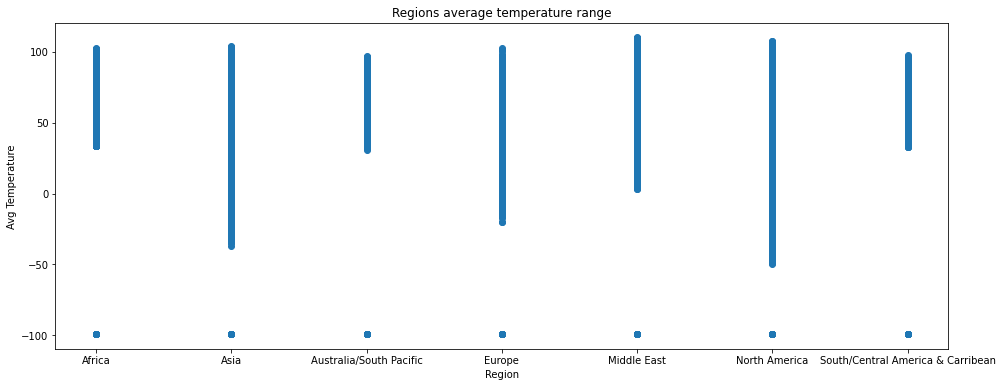

In [14]:
plt.figure(figsize= (16,6))
plt.scatter(x= cities_temp["Region"], y= cities_temp["AvgTemperature"])

plt.xlabel("Region")
plt.ylabel("Avg Temperature")
plt.title("Regions average temperature range")

* Here we have some out of range data, that they are invalid. So we decided to delete these values. 

In [15]:
out_of_range = cities_temp[cities_temp['AvgTemperature']==-99]['Region'].reset_index()
out_of_range

,index,Region
0,220,Africa
1,221,Africa
2,408,Africa
3,409,Africa
4,1453,Africa
...,...,...
79667,2905471,North America
79668,2905534,North America
79669,2905689,North America
79670,2905726,North America


In [16]:
count = 0
out_of_range_dict = {}
for i in out_of_range['Region']:
    if i not in out_of_range_dict.keys():
        out_of_range_dict[i] = count + 1
    else:
        out_of_range_dict[i] = out_of_range_dict[i]+1
    count = 0
out_of_range_dict

{'Africa': 30199,
 'Asia': 10500,
 'Australia/South Pacific': 387,
 'Europe': 13288,
 'Middle East': 3938,
 'North America': 8521,
 'South/Central America & Carribean': 12839}

Text(0, 0.5, 'Count')

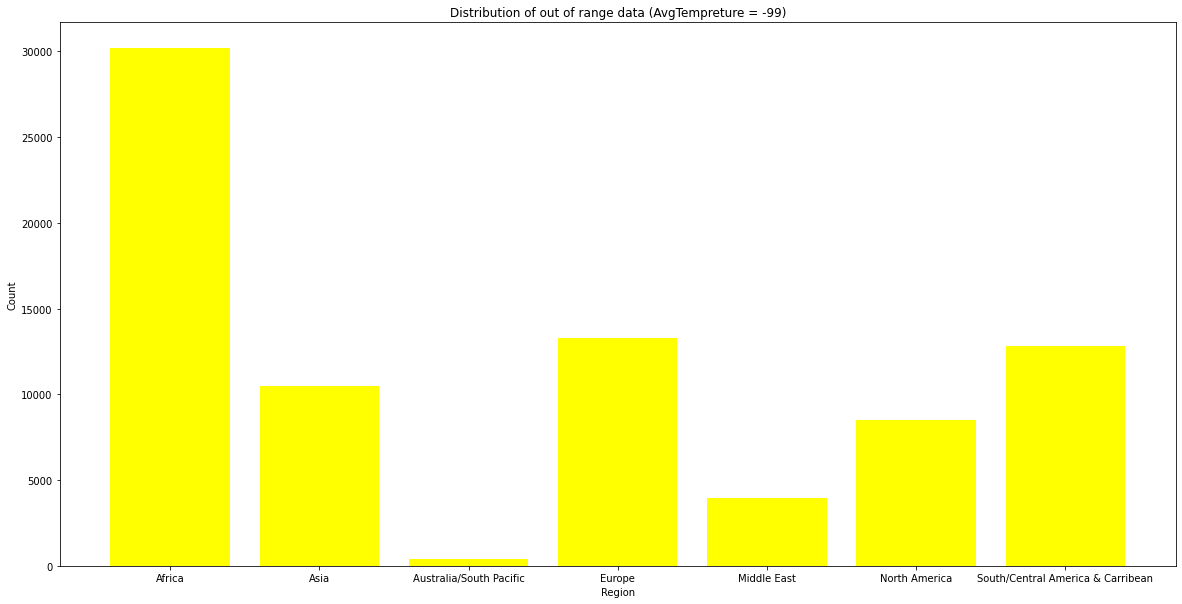

In [17]:
plt.figure(figsize= (20, 10))
plt.bar(x= out_of_range_dict.keys(), height = out_of_range_dict.values(), color = 'yellow')

plt.title('Distribution of out of range data (AvgTempreture = -99)')
plt.xlabel('Region')
plt.ylabel('Count')

In [18]:
cities_temp = cities_temp[cities_temp['AvgTemperature'] != -99]

Text(0.5, 1.0, 'Regions average temperature range')

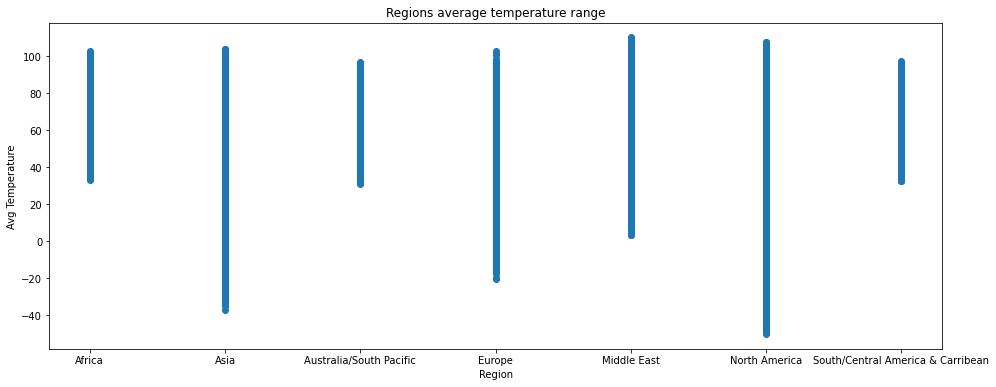

In [19]:
plt.figure(figsize= (16,6))
plt.scatter(x= cities_temp["Region"], y= cities_temp["AvgTemperature"])

plt.xlabel("Region")
plt.ylabel("Avg Temperature")
plt.title("Regions average temperature range")

In [20]:
avg_temp_in_every_region = cities_temp.groupby("Region")["AvgTemperature"].mean()
avg_temp_in_every_region

Region
Africa                               74.402602
Asia                                 68.109723
Australia/South Pacific              62.303693
Europe                               51.947171
Middle East                          73.840683
North America                        56.150198
South/Central America & Carribean    72.202024
Name: AvgTemperature, dtype: float64

Text(0.5, 1.0, 'Regions average temperature')

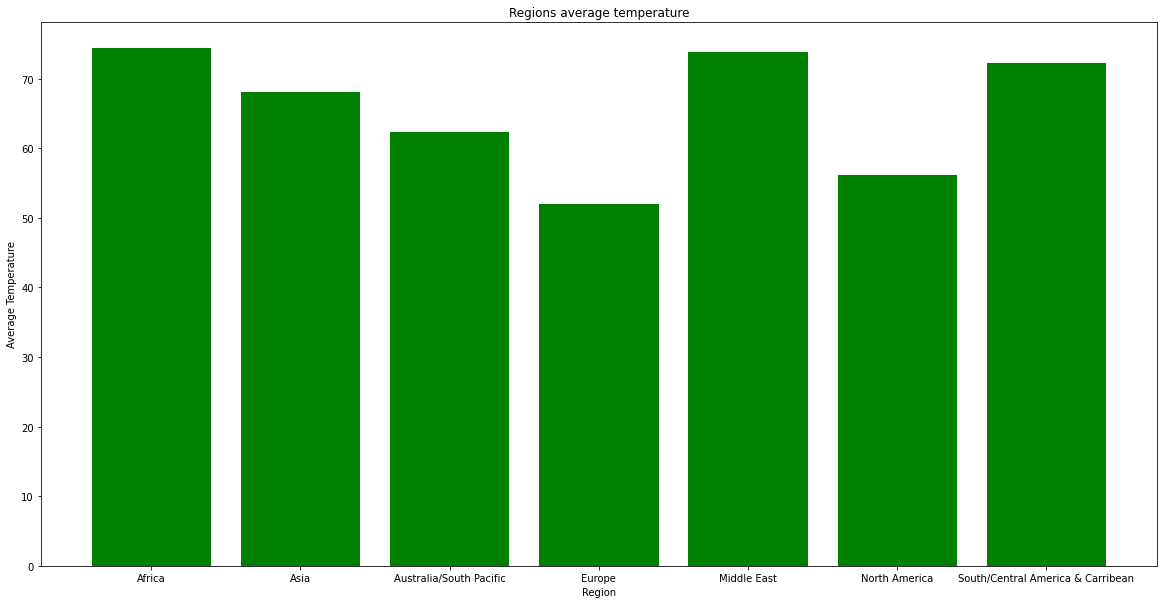

In [21]:
plt.figure(figsize= (20,10))

plt.bar(x= avg_temp_in_every_region.index, height= avg_temp_in_every_region.values, color= 'g')

plt.xlabel("Region")
plt.ylabel("Average Temperature")
plt.title("Regions average temperature")

In [22]:
cities_temp

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,San Juan Puerto Rico,7,30,2013,83.8


# Analyzing our Dataset by "Region"

In [23]:
index_df = cities_temp['Year'].unique()
regions = cities_temp['Region'].unique()

df = pd.DataFrame(index= index_df, columns= regions)
print(regions)

['Africa' 'Asia' 'Australia/South Pacific' 'Europe' 'Middle East'
 'North America' 'South/Central America & Carribean']


In [24]:
groupby_region_year = cities_temp.groupby(["Region", "Year"])["AvgTemperature"].mean().reset_index()

## Africa:

In [25]:
africa = groupby_region_year[groupby_region_year['Region'] == 'Africa']
africa

,Region,Year,AvgTemperature
0,Africa,1995,73.890036
1,Africa,1996,73.554702
2,Africa,1997,73.441142
3,Africa,1998,73.748808
4,Africa,1999,73.894222
5,Africa,2000,73.417745
6,Africa,2001,74.296694
7,Africa,2002,74.288789
8,Africa,2003,74.783506
9,Africa,2004,74.639458


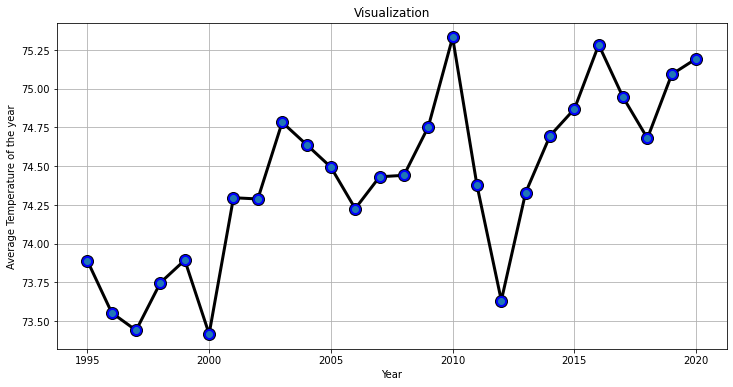

In [26]:
x= africa['Year']
y= africa['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='blue', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## Asia:

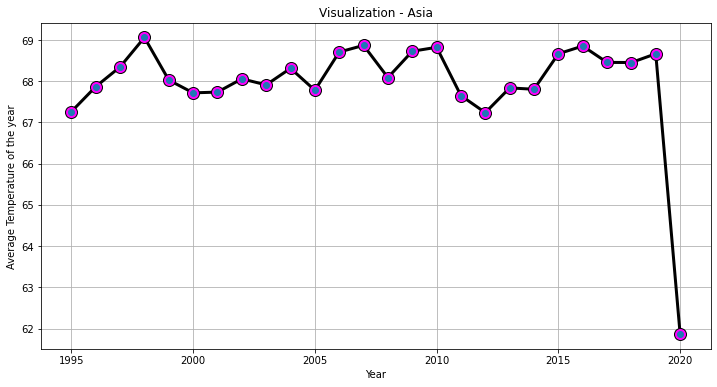

In [27]:
asia = groupby_region_year[groupby_region_year['Region'] == 'Asia']

x= asia['Year']
y= asia['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Asia')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='magenta', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! 
 So we decided to delete these invalid data of Asia.

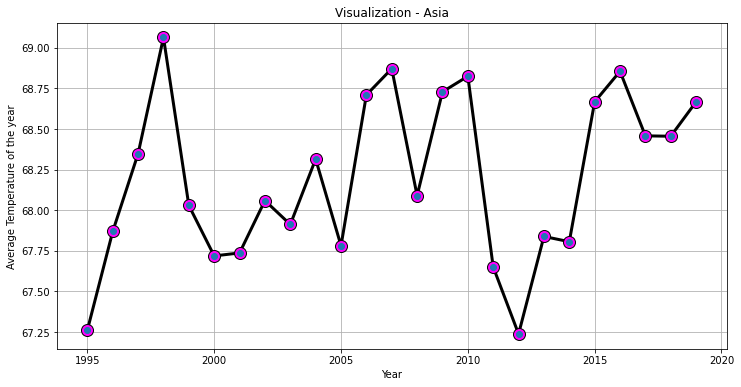

In [28]:
asia = asia[asia['Year'] != 2020]

x= asia['Year']
y= asia['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Asia')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='magenta', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## Australia/South Pacific:

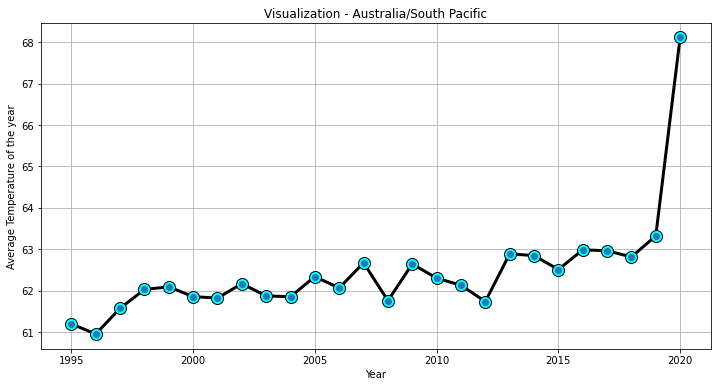

In [29]:
australia = groupby_region_year[groupby_region_year['Region'] == 'Australia/South Pacific']

x= australia['Year']
y= australia['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Australia/South Pacific')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='cyan', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! 
So we decided to delete these invalid data of Australia/South Pacific.

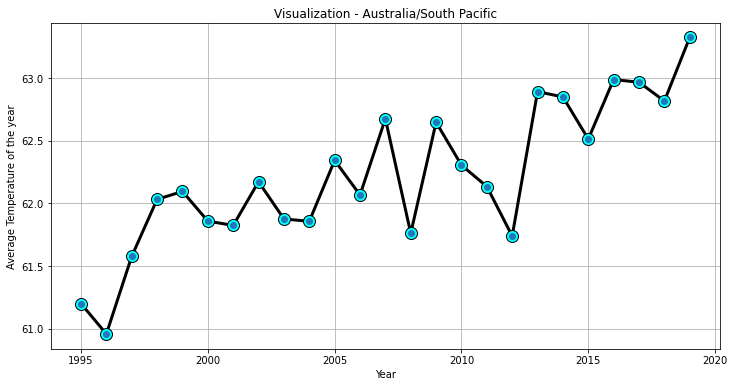

In [30]:
australia = australia[australia['Year'] != 2020]

x= australia['Year']
y= australia['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Australia/South Pacific')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='cyan', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## Europe:

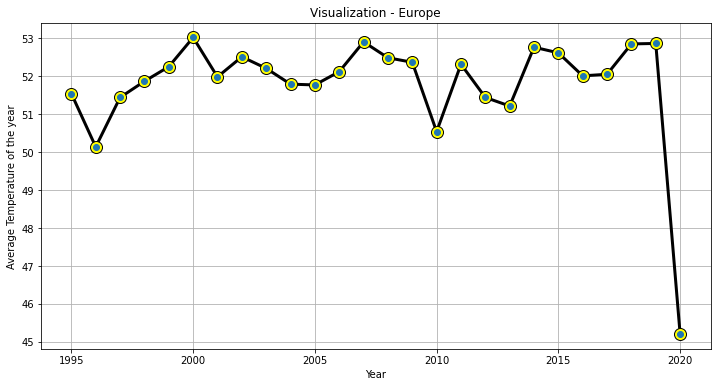

In [31]:
europe = groupby_region_year[groupby_region_year['Region'] == 'Europe']

x= europe['Year']
y= europe['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Europe')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='yellow', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! 
So we decided to delete these invalid data of Europe.

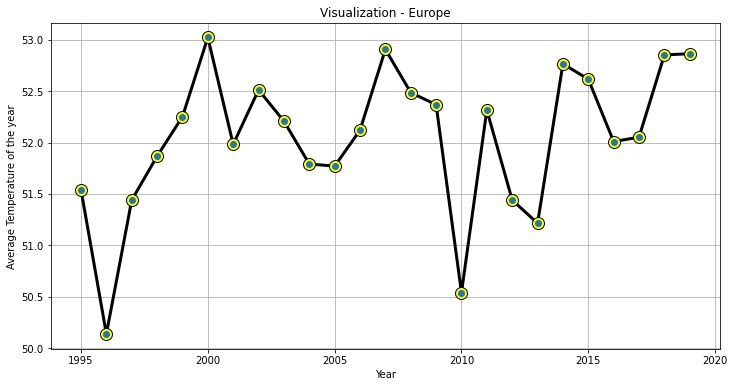

In [32]:
europe = europe[europe['Year'] != 2020]

x= europe['Year']
y= europe['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Europe')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='yellow', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## Middle East:

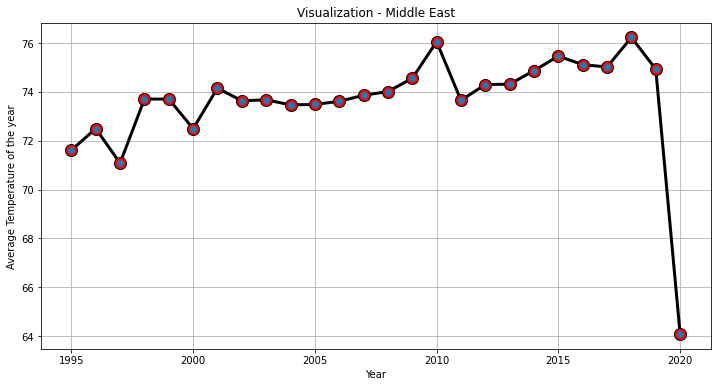

In [33]:
middle_east = groupby_region_year[groupby_region_year['Region'] == 'Middle East']

x= middle_east['Year']
y= middle_east['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Middle East')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='red', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! 
So we decided to delete these invalid data of Middle East.

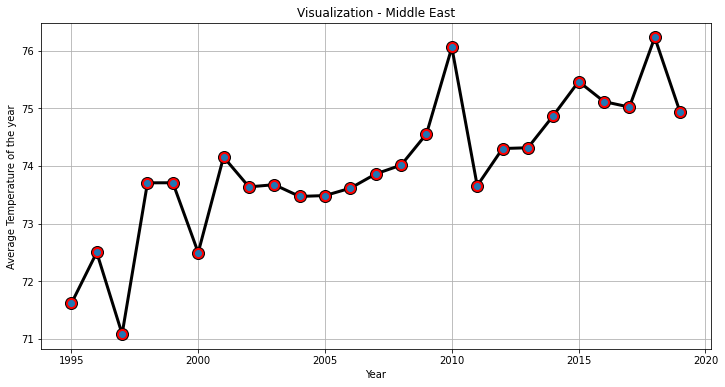

In [34]:
middle_east = middle_east[middle_east['Year'] != 2020]

x= middle_east['Year']
y= middle_east['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Middle East')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='red', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## North America:

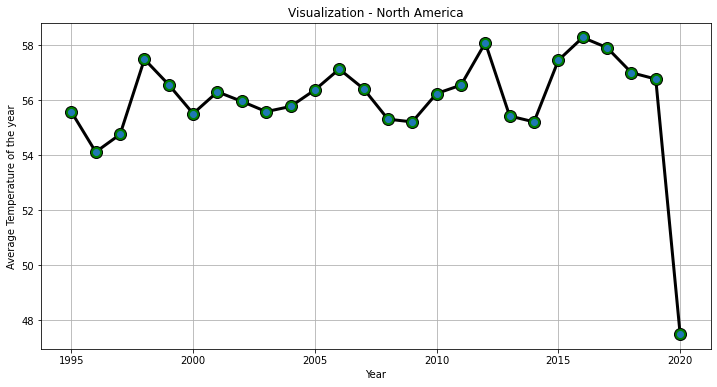

In [35]:
north_america = groupby_region_year[groupby_region_year['Region'] == 'North America']

x= north_america['Year']
y= north_america['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - North America')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='green', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! 
So we decided to delete these invalid data of North America.

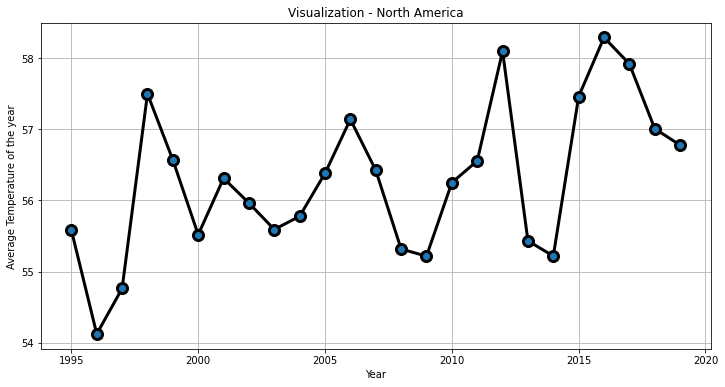

In [36]:
north_america = north_america[north_america['Year'] != 2020]

x= north_america['Year']
y= north_america['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - North America')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='black', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## South/Central America & Carribean:

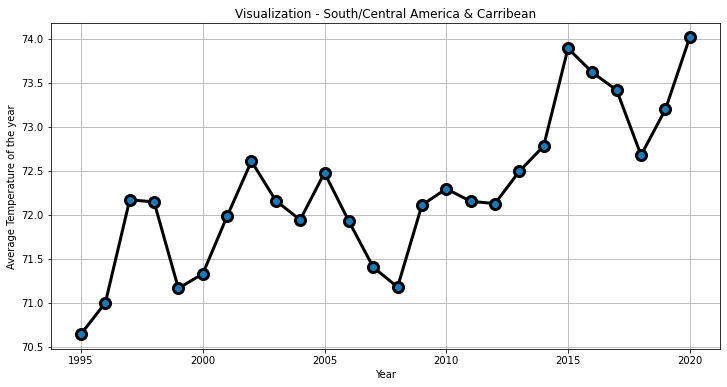

In [37]:
south_central_america = groupby_region_year[groupby_region_year['Region'] == 'South/Central America & Carribean']

x= south_central_america['Year']
y= south_central_america['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - South/Central America & Carribean')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='black', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

# Visualizing all regions average temperatures by year

* Since year 2020 is not valid for all the regions. So we delete the year 2020 for all regions from our data frame.

In [38]:
cities_temp_until_2019 = cities_temp[cities_temp['Year'] != 2020]

In [39]:
region_list = [africa, asia, europe, middle_east, south_central_america, north_america, australia]
colors= ['red','blue', 'green', 'purple', 'orange', 'black', 'cyan']

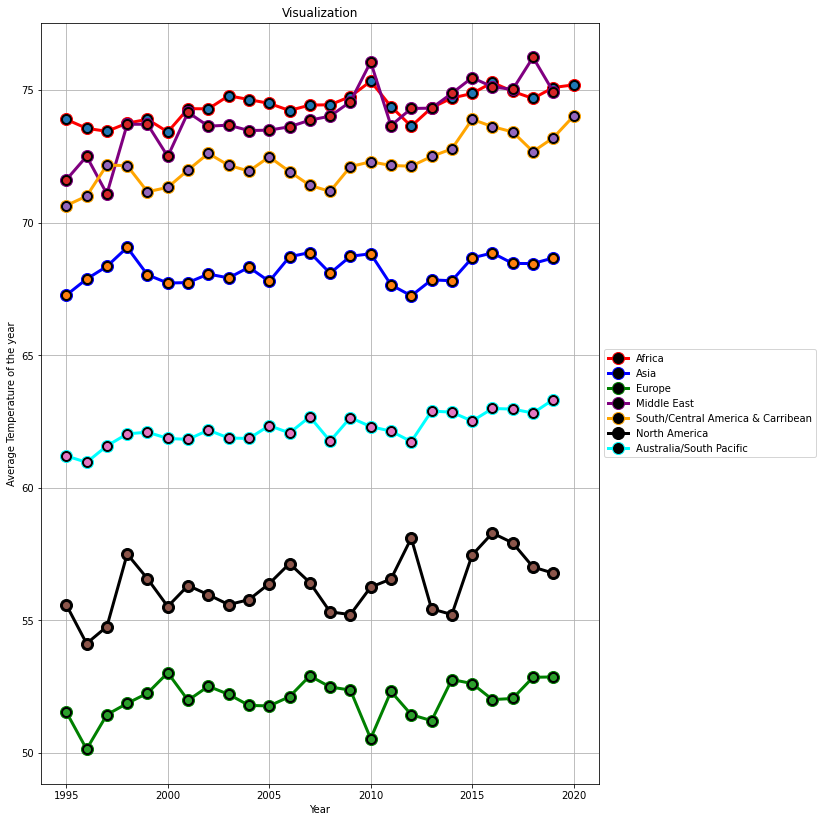

In [40]:
plt.figure(figsize=(10, 14))

for region, co in zip(region_list, colors):
    x= region['Year']
    y= region['AvgTemperature']
    
    plt.title('Visualization')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature of the year')
    plt.plot(x, y, linewidth = 3, color= co,
            marker='o', markerfacecolor='black', markersize=12, label = region.iloc[0,0])
    plt.grid()
    plt.plot(x, y, 'o')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [41]:
AvgT_1995_2019 = [africa[africa['Year']==1995]['AvgTemperature'].reset_index(), 
                      africa[africa['Year']==2019]['AvgTemperature'].reset_index()]

#af_2019 = africa[africa['Year']==2019]['AvgTemperature'].reset_index()
AvgT_1995_2019[1]['AvgTemperature'][0]

75.09262824275149

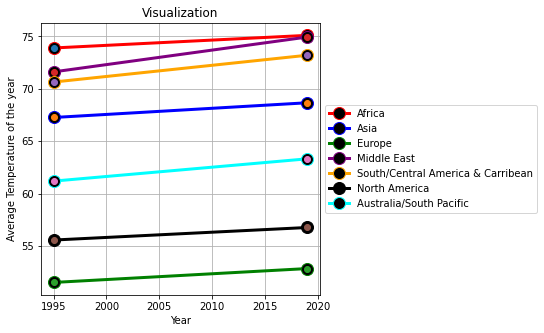

In [42]:
plt.figure(figsize=(5, 5))



for region, co in zip(region_list, colors):
    AvgT_1995_2019 = [region[region['Year']==1995]['AvgTemperature'].reset_index(), 
                      region[region['Year']==2019]['AvgTemperature'].reset_index()]
    temp_list = [AvgT_1995_2019[0]['AvgTemperature'][0], AvgT_1995_2019[1]['AvgTemperature'][0]]
    
    x= [1995, 2019]
    y= temp_list
    
    plt.title('Visualization')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature of the year')
    plt.plot(x, y, linewidth = 3, color= co,
            marker='o', markerfacecolor='black', markersize=12, label = region.iloc[0,0])
    plt.grid()
    plt.plot(x, y, 'o')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))